In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage import io
import IPython
import PIL
from PIL import Image

In [2]:
def load_images_from_folder_greyscale(folder):
    images = []
    for filename in os.listdir(folder):
        img = np.array(Image.open(os.path.join(folder,filename)).convert('L'))
        if img is not None:
            images.append(img)
    return images

In [3]:
images_synthetic = load_images_from_folder_greyscale("./cvidea/validation_cvedia/Data")
images_real = load_images_from_folder_greyscale("./cvidea/validation_flir/PreviewData")

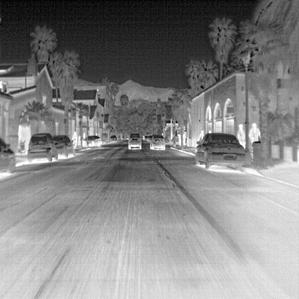

In [4]:
IPython.display.display(PIL.Image.fromarray(images_real[0]))

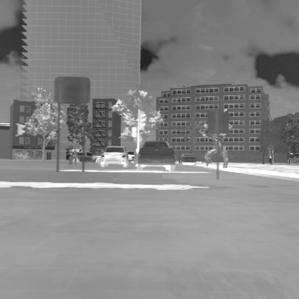

In [5]:
IPython.display.display(PIL.Image.fromarray(images_synthetic[0]))

### Plotting Histograms

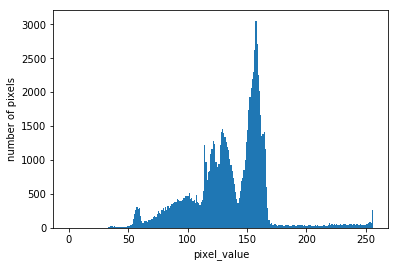

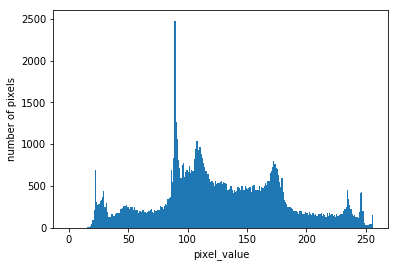

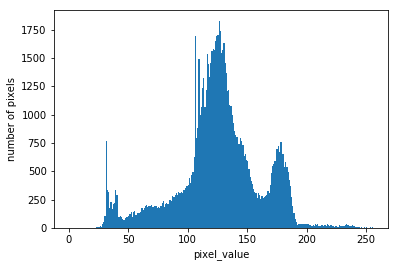

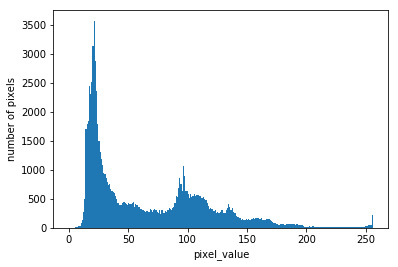

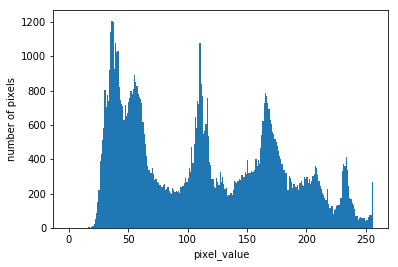

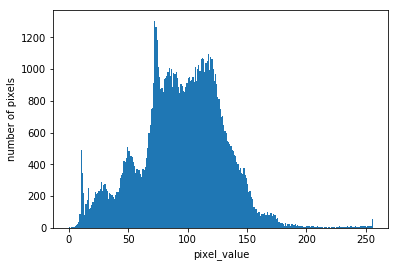

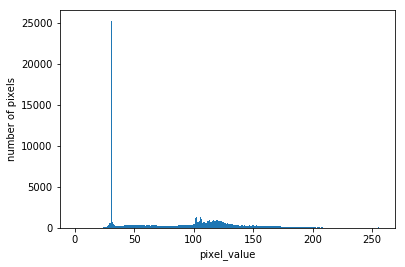

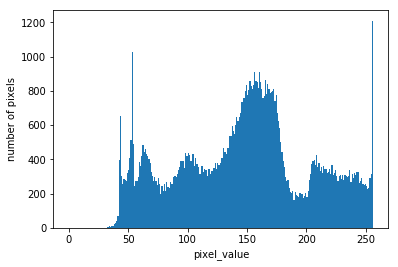

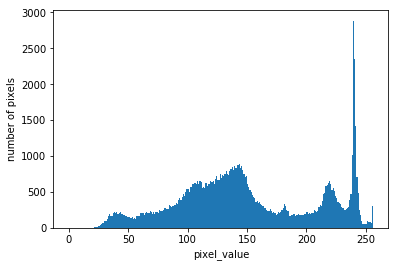

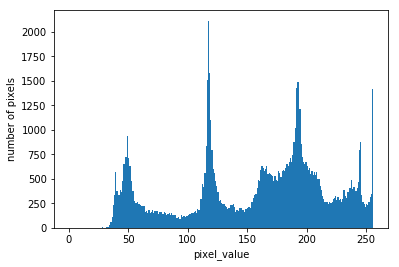

In [6]:
for img in images_synthetic[:10]:
    plt.xlabel('pixel_value', fontsize=10)
    plt.ylabel('number of pixels', fontsize=10)
    plt.hist(img.ravel(),256,[0,256]) 
    plt.show()

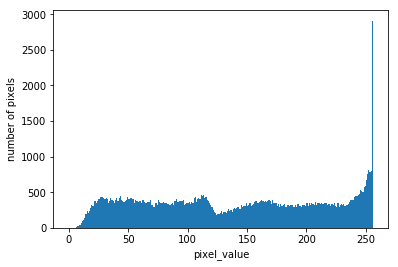

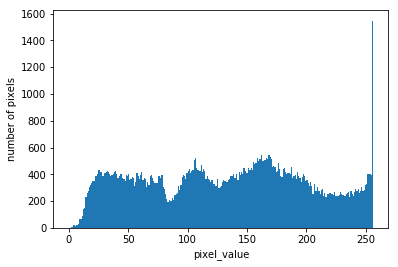

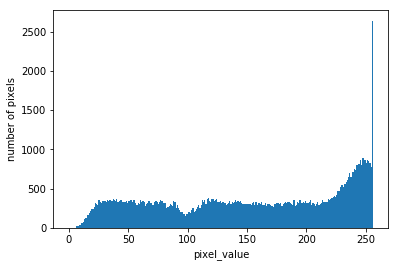

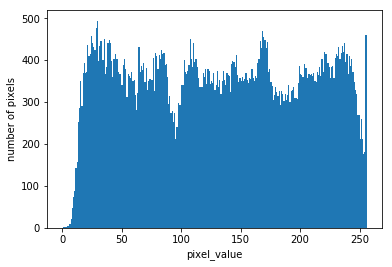

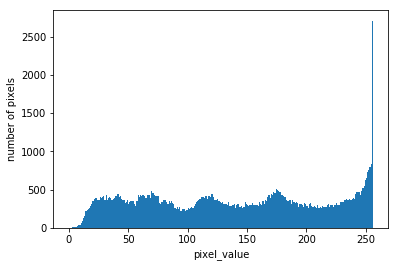

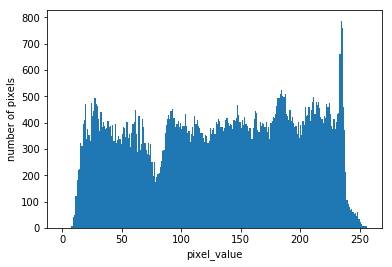

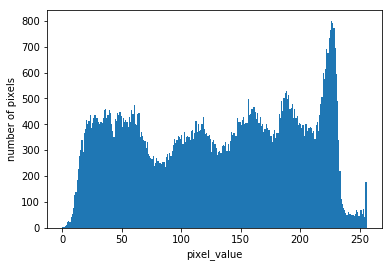

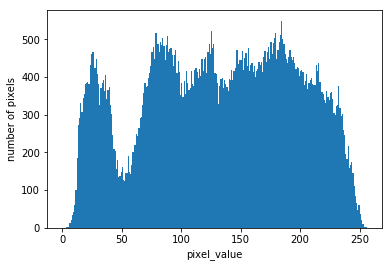

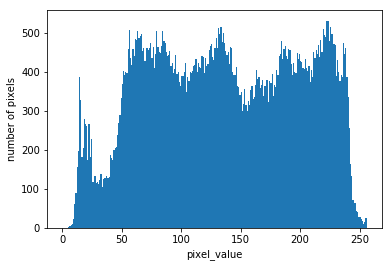

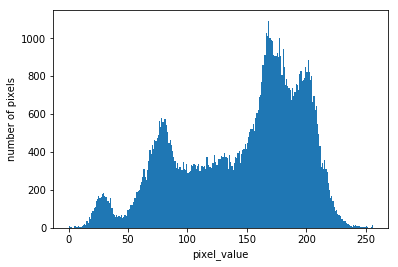

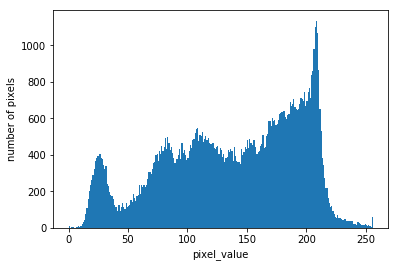

In [7]:
for img in images_real[100:111]:
    plt.xlabel('pixel_value', fontsize=10)
    plt.ylabel('number of pixels', fontsize=10)
    plt.hist(img.ravel(),256,[0,256]) 
    plt.show()

### PCA on data

In [8]:
from sklearn.decomposition import PCA

In [9]:
images_real = [i.ravel() for i in images_real]
images_synthetic = [i.ravel() for i in images_synthetic]

In [10]:
pca = PCA(n_components=2)

In [11]:
reduced_real = pca.fit_transform(images_real)

In [12]:
reduced_synthetic = pca.fit_transform(images_synthetic)

In [13]:
def plot_scatter(data):
    x = data[:,0]
    y = data[:,1]
    axes = plt.gca()
    axes.set_xlim([-20000,20000])
    axes.set_ylim([-10000,20000])
    plt.scatter(x,y)
    plt.show()

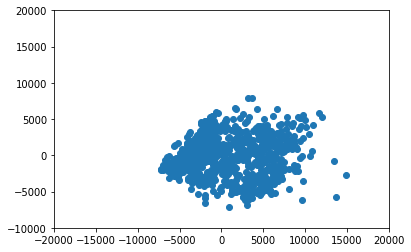

In [14]:
plot_scatter(reduced_real)

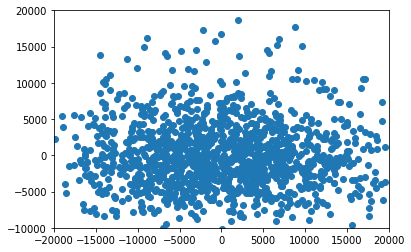

In [15]:
plot_scatter(reduced_synthetic)